In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import embed
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import manifold
rng = np.random.default_rng(seed=0)
model = SentenceTransformer("all-MiniLM-L6-v2")

rng = np.random.default_rng()
root_path =  Path("")
data_path = root_path / "data"
run = "2024-05-14-num_games_8934"
embeddings_path = data_path / "combined_clues" / run / "embeddings"

## Current code:
clues = embed.load_clues(run)
embeddings = np.load(embeddings_path / "all_embeddings.npy")
n_subsamples = 50_000
# indices = rng.choice(len(clues), n_subsamples, replace=False)
subsampled_embeddings = embeddings[-n_subsamples:]
subsampled_clues = clues.iloc[-n_subsamples:]
del embeddings, clues

In [3]:
n_dimensions = 50
pca = PCA(n_components=None)
pca.fit(subsampled_embeddings)

PCA()

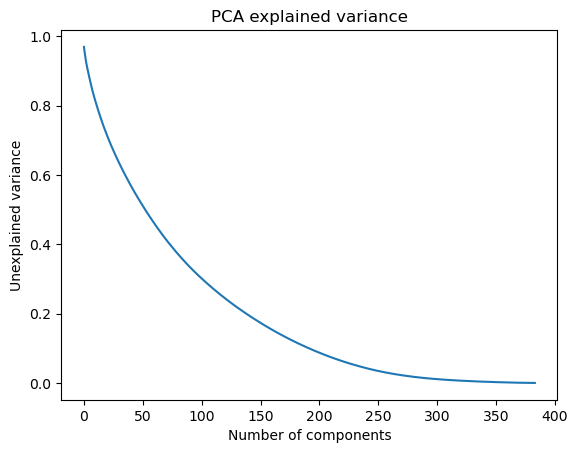

In [4]:
fig, ax = plt.subplots()
ax.plot(1 - np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel="Number of components", ylabel="Unexplained variance", title="PCA explained variance");

In [5]:
normalize = lambda X : X / np.linalg.norm(X, axis=1, keepdims=True)
n_clusters = 200
kmeans = KMeans(n_clusters=n_clusters, random_state=0, verbose=0, n_init=2).fit(normalize(subsampled_embeddings))

In [8]:
cluster_ix = 1
cluster_center = kmeans.cluster_centers_[cluster_ix]

cluster_component_ixs = np.argwhere(kmeans.labels_ == cluster_ix).flatten()
subsampled_clues.iloc[cluster_component_ixs]

,category,question,response,clue_value,show_number,show_date
471436,THE CAKE IS A LIE,Cakebread Cellars doesn't bake cakes but makes...,wine,200,8351,2021-03-08
471437,THE CAKE IS A LIE,A surprisingly easy victory is known as one of...,a cakewalk,400,8351,2021-03-08
471953,GET 'EM WHILE THEY'RE COLD,A hot day is a good time for this jiggly treat...,Jell-O,100,8360,2021-03-19
472011,EGG,"This brand, a chocolate malt mix that's added ...",Ovaltine,400,8361,2021-03-22
472219,TV LOCALES,"Amidst odd happenings on this show, agent Dale...",Twin Peaks,800,8364,2021-03-25
...,...,...,...,...,...,...
520680,IN THE BLACK,These 2 words can precede cake (meaning chocol...,Black Forest,200,9093,2024-05-01
520696,REPETITION,"Similar to a truffle (the confectionery kind),...",bon bon,600,9093,2024-05-01
520705,1950s TALK,1950s pescatarians could indulge in these batt...,fish sticks,200,9094,2024-05-02
520858,THE RESPONSE'S GPA,2.0:Lazarus Naturals makes creams & gummies ou...,CBD,200,23,2024-05-06


In [9]:
n_subsamples / n_clusters

250.0

In [66]:
similarities = util.cos_sim(kmeans.cluster_centers_, kmeans.cluster_centers_)
# plt.imshow(similarities)
lower_dim_cluster_centers = manifold.Isomap(n_components=2).fit_transform(kmeans.cluster_centers_)

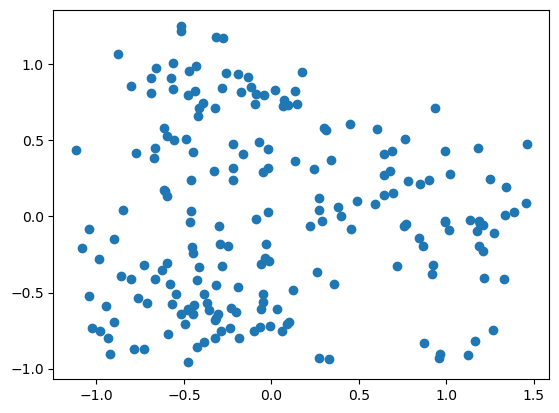

In [67]:
plt.scatter(lower_dim_cluster_centers[:, 0], lower_dim_cluster_centers[:, 1])